In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from utils import *

In [41]:
images = []
for i in range(1,6):
    images.append(f'images/image{i}.jpeg')


# Task 1: gray scaling
Analysis:
1. Based on the formula of weighted grayscaling, the images with more green tend to have a higher loss (MSE) (as we see on 2th,3th and 5th examples).
2. Green colors tend to appear lighter in Luminosity grayscale
3. Red colours tend to appear lighter in Luminosity grayscale
4. Based on the first picture, there is not a significant change in blue colour

processing the image 1


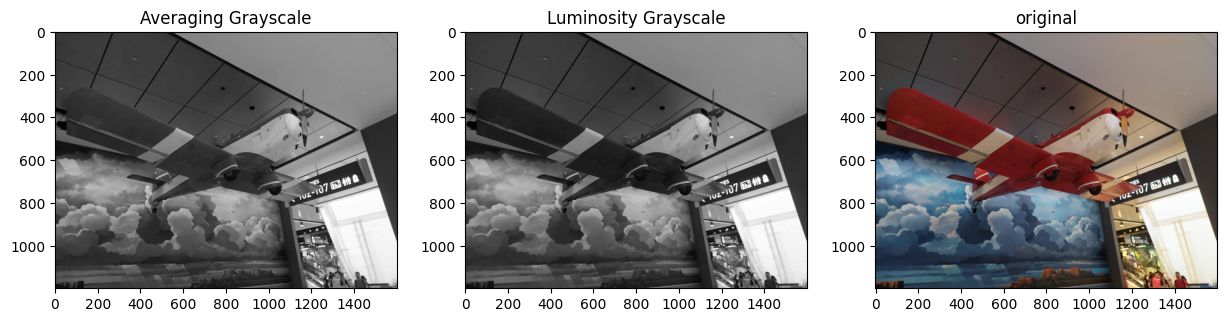

MSE loss for image 1: 22.85700989583334
processing the image 2


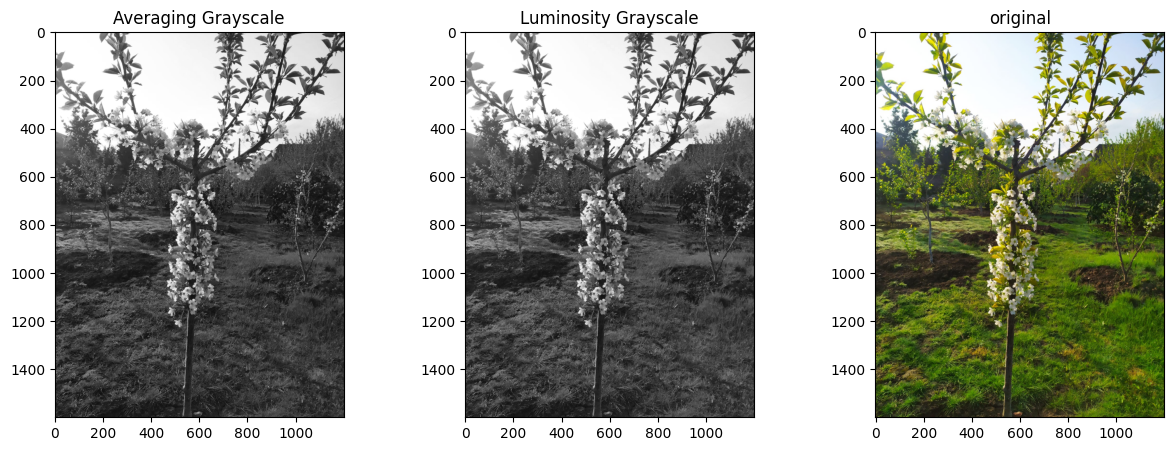

MSE loss for image 2: 27.157856770833327
processing the image 3


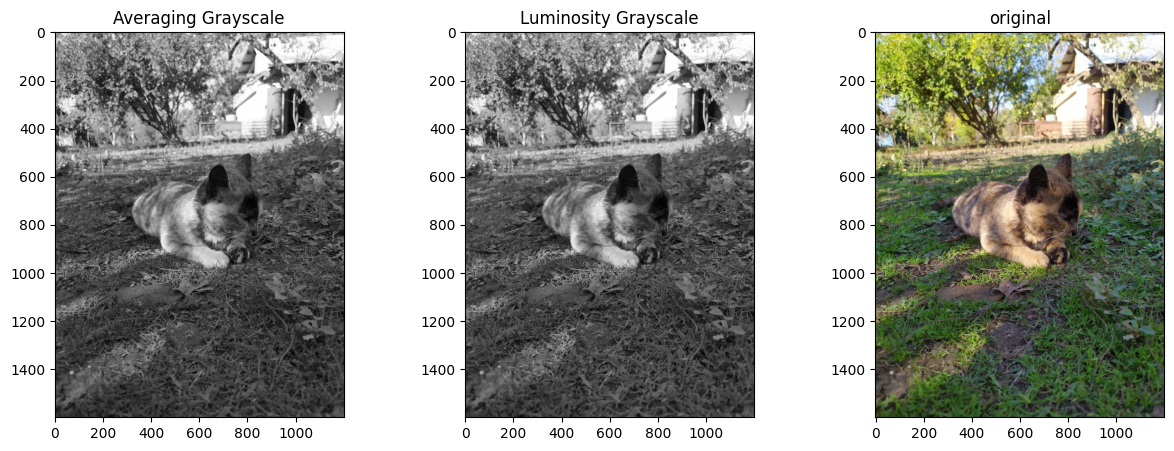

MSE loss for image 3: 27.817827604166663
processing the image 4


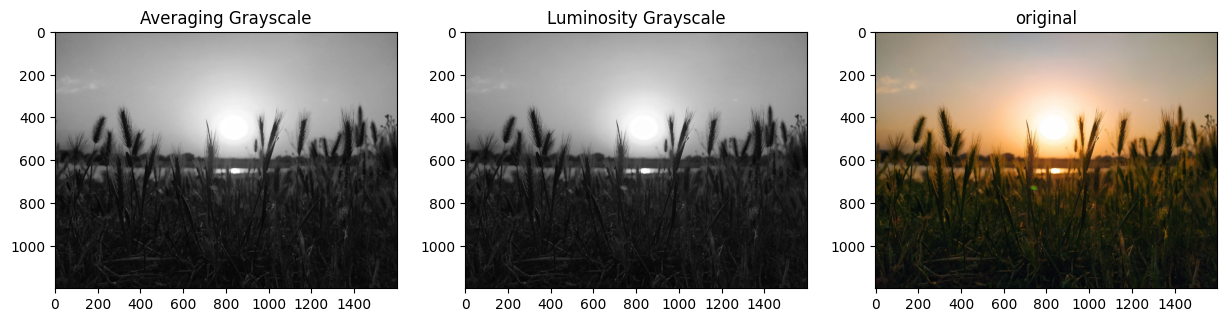

MSE loss for image 4: 21.990453125000005
processing the image 5


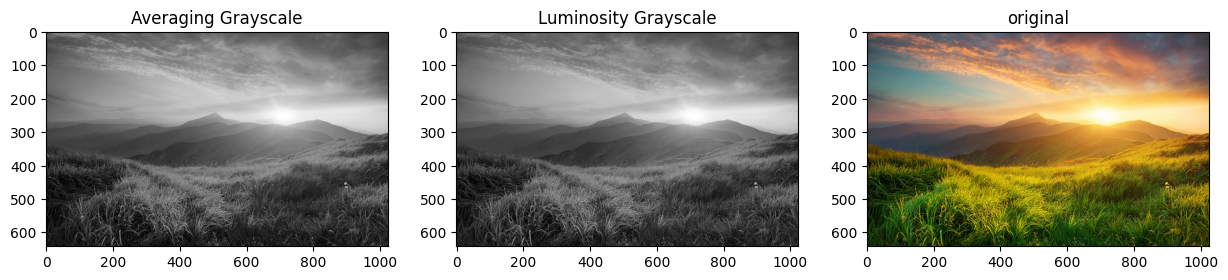

MSE loss for image 5: 52.75381194022585


In [43]:
count = 0
for image in images:
    count+=1
    image = read_image(image)
    image_average_gscaling=grayscale_average(image)
    image_weighted_gscaling=grayscale_weighted(image)
    plt.figure(figsize=(15, 5))
    print(f"processing the image {count}")
    plt.subplot(1, 3, 1)
    plt.title('Averaging Grayscale')
    plt.imshow(image_average_gscaling, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Luminosity Grayscale')
    plt.imshow(image_weighted_gscaling, cmap='gray')
    plt.subplot(1, 3, 3)

    plt.title('original')
    plt.imshow(image)
    plt.show()
    print(f"MSE loss for image {count}:",mse(image_average_gscaling,image_weighted_gscaling))
    print("="*50)

# Task 2: quantization
I have applied the three quantiozation algorithms, the following snippet will apply three of them on images

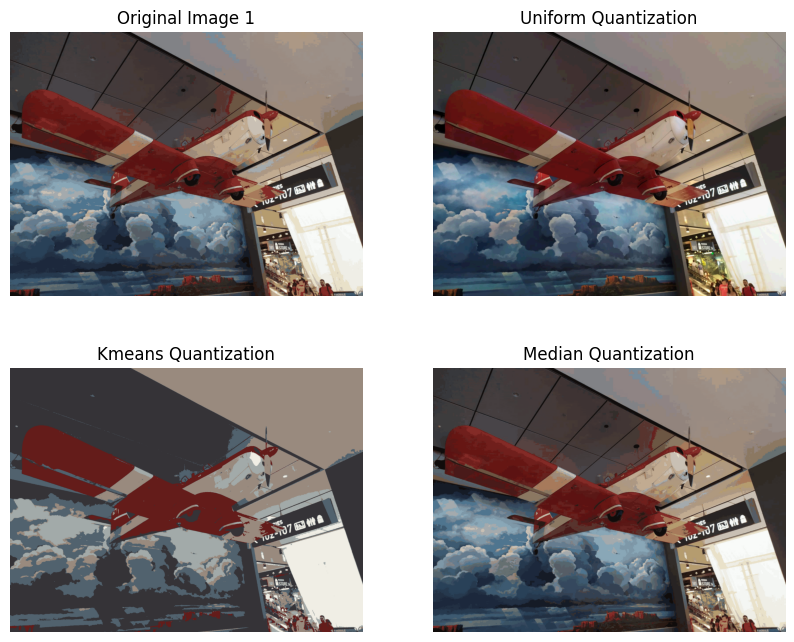

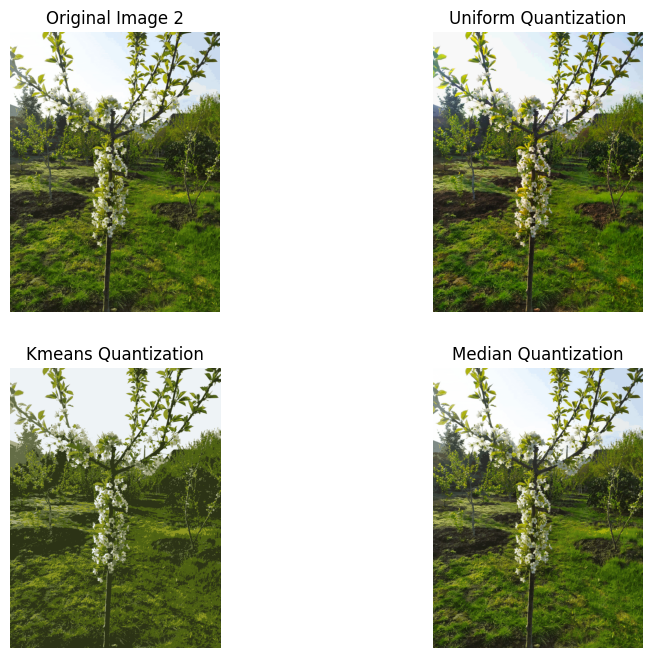

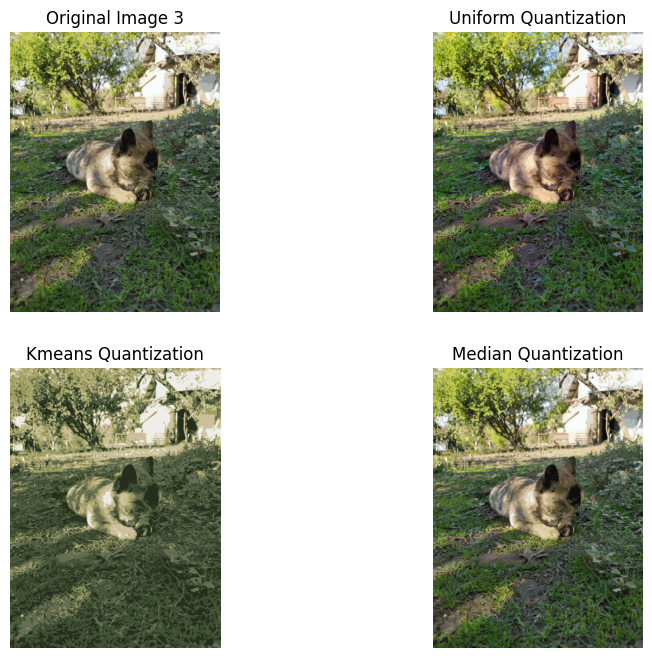

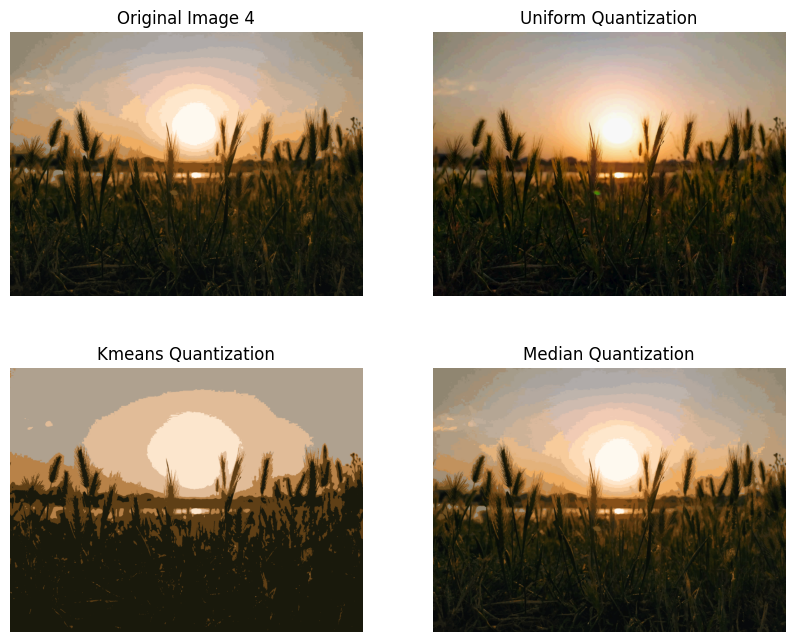

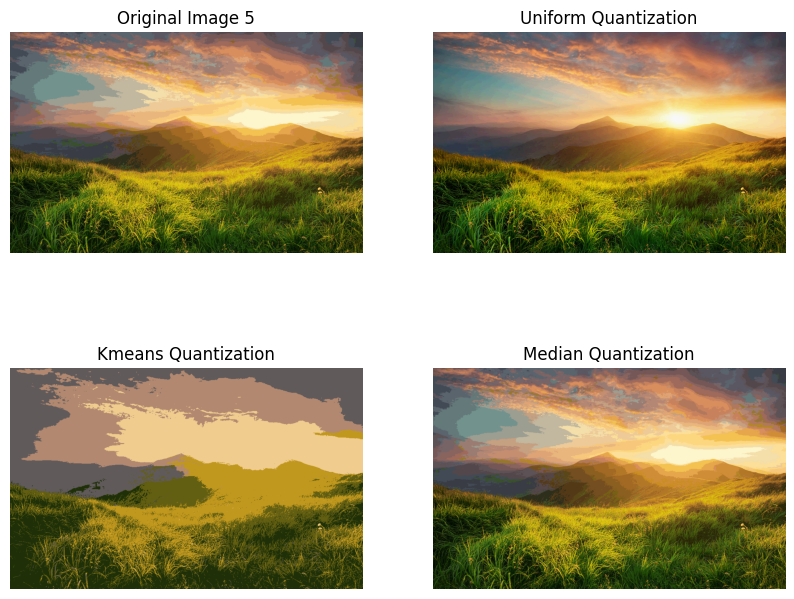

In [44]:
uniform_range = 32
kmeans_class = 6
median_depth = 6
count = 0
for image_path in images:

    count+=1

    image = read_image(image_path)
    # Apply quantizations
    uniform_q_image = uniform_quantization(image, uniform_range)
    kmeans_q_image = kmeans_quantization(image, kmeans_class)
    median_q_image = median_quantization(image, median_depth)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

    # Plot each image
    axes[0, 0].imshow(image)
    axes[0, 0].set_title(f"Original Image {count}")
    axes[0, 0].axis("off")  # Hide axes

    axes[0, 1].imshow(uniform_q_image)
    axes[0, 1].set_title("Uniform Quantization")
    axes[0, 1].axis("off")  # Hide axes

    axes[1, 0].imshow(kmeans_q_image, cmap="gray")
    axes[1, 0].set_title("Kmeans Quantization")
    axes[1, 0].axis("off")  # Hide axes

    axes[1, 1].imshow(median_q_image, cmap="gray")
    axes[1, 1].set_title("Median Quantization")
    axes[1, 1].axis("off")  # Hide axes


plt.show()


# Task 3
Changed the hue, saturation, brightness and lightness of the image

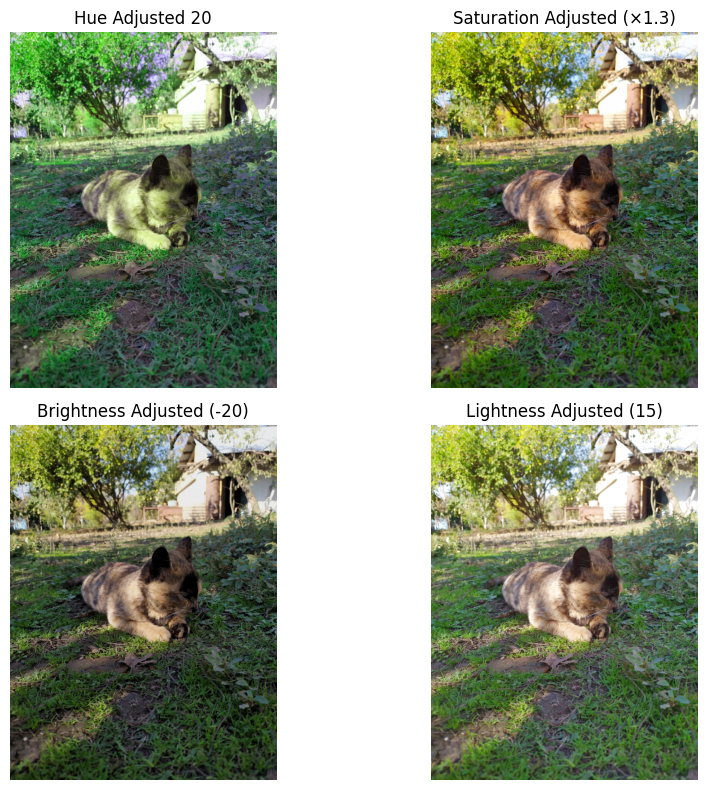

In [45]:
image = cv2.imread(images[2])

#change the variabless
hue_shift = 20
saturation_scale= 1.3
brightness_shift = -20
lightness_shift = 15



# Apply transformations
hue_adjusted = adjust_hue(image, hue_shift=hue_shift)
saturation_adjusted = adjust_saturation(image, saturation_scale=saturation_scale)
brightness_adjusted = adjust_brightness(image, brightness_shift=brightness_shift)
lightness_adjusted = adjust_lightness(image, lightness_shift=lightness_shift)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
axes[0, 0].imshow(hue_adjusted)
axes[0, 0].set_title(f"Hue Adjusted {hue_shift}")
axes[0, 0].axis("off")

axes[0, 1].imshow(saturation_adjusted)
axes[0, 1].set_title(f"Saturation Adjusted (×{saturation_scale})")
axes[0, 1].axis("off")

axes[1, 0].imshow(brightness_adjusted)
axes[1, 0].set_title(f"Brightness Adjusted ({brightness_shift})")
axes[1, 0].axis("off")

axes[1, 1].imshow(lightness_adjusted)
axes[1, 1].set_title(f"Lightness Adjusted ({lightness_shift})")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


# Assignment 4
run main.py